# Rapidly-exploring Random Trees (RRT)
### Input: start: Tuple, goal: Tuple, obstacles: List[List[Tuple]], space_size: Tuple
// rrt(start, goal, obstacles, space_size), nearest_point(point, tree), colliding(p1, p2, obstacle)
// cost from all points to all points is constant (penalty on number of points traversed, not on the distance between points as d at each step is constant.


In [6]:
import numpy

In [7]:
def distance(p1, p2):
    """distance between 2 points"""
    return (p1[0]-p2[0])**2 + (p1[1]-p2[1])**2

In [8]:
def nearest_point(point, tree):
    """point in the tree which is nearest to the given point"""
    dist = [distance(point, x) for x in tree]
    res = tree[numpy.argmin(dist)]
    return res

In [4]:
nearest_point((0,0), [(1,1), (1,2), (2,2)])

(1, 1)

In [9]:
def onSegment(q, l1):
    if ( (q[0] <= max(l1[0][0], l1[1][0])) and (q[0] >= min(l1[0][0], l1[1][0])) and
           (q[1] <= max(l1[0][1], l1[1][1])) and (q[1]>= min(l1[0][1], l1[1][1]))):
        return True
    return False
 
def orientation(p, q, r):
    """
    to find the orientation of an ordered triplet (p,q,r)
    Returns:
    ========
    0 : Colinear points
    1 : Clockwise points
    2 : Counterclockwise
    """
    val = (float(q[1] - p[1]) * (r[0] - q[0])) - (float(q[0] - p[0]) * (r[1] - q[1]))
    if (val > 0):
        # Clockwise orientation
        return 1
    elif (val < 0):
        # Counterclockwise orientation
        return 2
    else:
        # Colinear orientation
        return 0
 
 # The main function that returns true if
# the line segment 'p1q1' and 'p2q2' intersect.
def doIntersect(l1,l2):
     
    # Find the 4 orientations required for
    # the general and special cases
    p1, q1 = l1
    p2, q2 = l2
    o1 = orientation(p1, q1, p2)
    o2 = orientation(p1, q1, q2)
    o3 = orientation(p2, q2, p1)
    o4 = orientation(p2, q2, q1)
 
    # General case
    if ((o1 != o2) and (o3 != o4)):
        return True
 
    # Special Cases
 
    # p1 , q1 and p2 are colinear and p2 lies on segment p1q1
    if ((o1 == 0) and onSegment(p2, [p1, q1])):
        return True
 
    # p1 , q1 and q2 are colinear and q2 lies on segment p1q1
    if ((o2 == 0) and onSegment(q2, [p1, q1])):
        return True
 
    # p2 , q2 and p1 are colinear and p1 lies on segment p2q2
    if ((o3 == 0) and onSegment(p1, [p2, q2])):
        return True
 
    # p2 , q2 and q1 are colinear and q1 lies on segment p2q2
    if ((o4 == 0) and onSegment(q1, [p2, q2])):
        return True
 
    # If none of the cases
    return False

In [10]:
def colliding(p1, p2, obstacle):
    """line segment p1p2 intersects the given obstacle or not"""
    # identify boundary of the obstacle as the combination of line segments between the closest vertices.
    lines = []
    for point in obstacle:
        temp = obstacle.copy()
        temp.remove(point)
        np1 = nearest_point(point, temp)
        temp.remove(np1)
        np2 = nearest_point(point, temp)
        if (point, np1) not in lines and (np1, point) not in lines:
            lines.append((point, np1))
        if (point, np2) not in lines and (np2, point) not in lines:
            lines.append((point, np2))
    # given line segment intersects with any of the line segments in obstacle boundary
    resp = [doIntersect((p1, p2), x) for x in lines]
    return lines, resp

In [7]:
obs = [(0,0),(0,2), (2,2), (2,0)]
colliding((0,0), (1,1), obs)

([((0, 0), (0, 2)), ((0, 0), (2, 0)), ((0, 2), (2, 2)), ((2, 2), (2, 0))],
 [True, True, False, False])

In [11]:
def fixed_increment(p1, p2, d, space_size):
    """increment line p1p2 by a fixed distance of d such that result lies within space_size"""
    # vertical line
    if p1[0] == p2[0]:
        return (p2[0], min(p2[1]+d, space_size[1]))
    # horizontal line
    if p1[1] == p2[1]:
        return (min(p2[0]+d, space_size[0]), p2[1])
    # any other orientation
    m = (p2[1]-p1[1])/(p2[0]-p1[0])
    c = p2[1] - m*p2[0]
    a1 = (1+m*m)
    b1 = 2*(m*c - m*p2[1] - p2[0])
    c1 = p2[0]**2 + p2[1]**2 +c**2 - d**2 -2*c*p2[1]
    under = b1**2 - 4*a1*c1
    # in case of complex roots for x, considering x=0
    if under < 0:
        return (p1[0], min(p2[1]+d, space_size[1]))
    x = (-b1 + numpy.sqrt(under))/(2*a1)
    y = m*x + c
    x = min(max(0,x), space_size[0])
    y = min(max(0,y), space_size[1])
    return (x, y)

In [9]:
fixed_increment((0,0), (2,2), 0.2, (5,5))

(2.1414213562373097, 2.1414213562373097)

In [12]:
def goal_isvalid(goal, obstacles):
    for obstacle in obstacles:
        minx = min(obstacle, key=lambda x: x[0])[0]
        miny = min(obstacle, key=lambda x: x[1])[1]
        maxx = max(obstacle, key=lambda x: x[0])[0]
        maxy = max(obstacle, key=lambda x: x[1])[1]
        if goal[0]>= minx and goal[0]<=maxx\
        and goal[1]>=miny and goal[1]<=maxy:
            return False
    return True

In [11]:
goal_isvalid((1,1), [[(0,0), (0,2), (2,2), (2,0)]])

False

In [13]:
import networkx as ntx

In [14]:
def rrt(start, goal, obstacles, space_size, d=0.1):
    tree = [start]
    connections = []
    gph = ntx.DiGraph()
    if not goal_isvalid:
        return "Path not possible"
    goal_reachable = not any([any(colliding(start, goal, obstacle)[1]) for obstacle in obstacles])
    #print(goal_reachable)
    while not goal_reachable:
        new_point = tuple(numpy.random.uniform(space_size))
        nearest = nearest_point(new_point, tree)
        new_point = fixed_increment(new_point, nearest, d, space_size=space_size)
        if not any([any(colliding(nearest, new_point, obstacle)[1]) for obstacle in obstacles]):
            tree.append(new_point)
            connections.append((nearest, new_point))
            gph.add_edge(nearest, new_point)
            goal_reachable = not any([any(colliding(new_point, goal, obstacle)[1]) for obstacle in obstacles])
    tree.append(goal)
    connections.append((new_point, goal))
    gph.add_edge(new_point, goal)
    return tree, connections, gph

In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import matplotlib.animation as anim

In [32]:
start = (0,0)
goal = (5,5)
space_size = (6,6)
obstacles = [[(0,1), (1,1), (1,2), (0,2)], [(3,2), (3,3), (4,3)]]

tree, collections, gph = rrt(start, goal=goal, obstacles=obstacles, space_size=space_size, d=0.3)

In [33]:
shortest = ntx.shortest_path(gph, source=start, target=goal)

In [34]:
tree

[(0, 0),
 (0.39533396742624677, 0.30612261301482335),
 (0.8863452833041429, 0.40050421969672323),
 (1.1084724419177332, 0.8484545801232464),
 (1.5140302090705586, 1.140897561748751),
 (1.64858602106456, 1.6224520586217794),
 (1.9911534004034908, 1.9866602279602201),
 (2.3204139565659014, 2.362941354454253),
 (5, 5)]

In [18]:
def obstacle_boundaries(obstacle):
    lines = []
    for point in obstacle:
        temp = obstacle.copy()
        temp.remove(point)
        np1 = nearest_point(point, temp)
        temp.remove(np1)
        np2 = nearest_point(point, temp)
        if (point, np1) not in lines and (np1, point) not in lines:
            lines.append((point, np1))
        if (point, np2) not in lines and (np2, point) not in lines:
            lines.append((point, np2))
    return lines

<IPython.core.display.Javascript object>


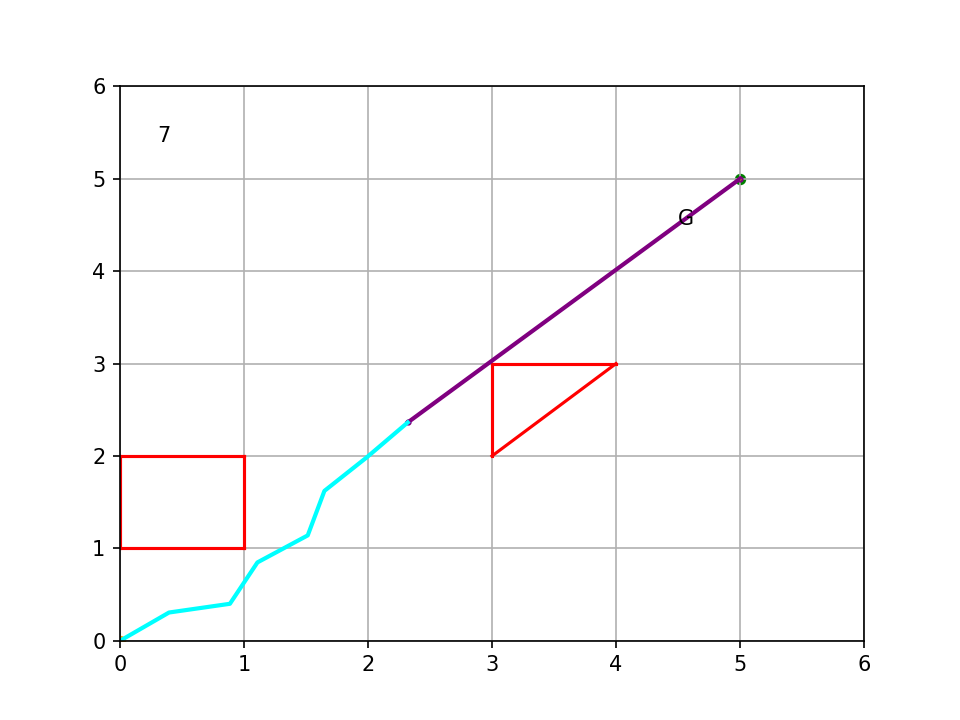

In [35]:
f = plt.figure()
ax = f.add_subplot(autoscale_on=False, xlim=(0, space_size[0]), ylim=(0, space_size[1]))
ax.grid()
for obs in obstacles:
    bounds = obstacle_boundaries(obs)
    for b in bounds:
        ax.plot([b[0][0], b[1][0]], [b[0][1], b[1][1]], color='red')
ax.scatter(start[0], start[1], s=20, color='orange', marker='o')
ax.scatter(goal[0], goal[1], s=20, color='green')
path, = ax.plot([], [], '-', lw=2, color='purple', marker='o', markersize=2, markerfacecolor='orange')
history, = ax.plot([], [], '-', lw=1, color='purple')
txt = ax.text(goal[0]-0.5, goal[1]-0.5, 'G')
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
final_path, = ax.plot([], [], '-', lw=2, color='cyan')
def animate(i):
    path.set_data([collections[i][0][0], collections[i][1][0]],
    [collections[i][0][1], collections[i][1][1]])
    xs = []
    ys = []
    for x in collections[:i+1]:
        xs.extend([x[0][0],x[1][0]])
        ys.extend([x[0][1], x[1][1]])
    history.set_data(xs, ys)
    time_text.set_text(i)
    
    final_path.set_data([x[0] for x in shortest[:min(i+1, len(shortest))]], [x[1] for x in shortest[:min(i+1, len(shortest))]])
    return path, history, time_text, final_path
ani = anim.FuncAnimation(f, animate, len(tree)-1, interval=1000, repeat=False, blit=True) 
plt.show()


In [30]:
Writer = anim.writers['ffmpeg']
writer = Writer(fps=4, metadata=dict(artist='Me'), bitrate=1800)

In [31]:
ani.save('rtt_motion.mp4', writer=writer)

### Dijkstra's Algorithm for shortest path

In [ ]:
input: graph:->{Tuple:List(Tuple(Tuple(int, int), int)...)}, start:->List[Tuple(int, int)...], goal->List[Tuple(int, int)...]
output: path:-> list[nodes]
visited, unvisited, neighbours, 

In [79]:
def dijkstra(graph, start, goal):
    graph[start[0]]=start[1:]
    graph[goal[0]]=goal[1:]
    for neighbor in goal[1:]:
        if neighbor[0] in graph:
            graph[neighbor[0]].append((goal[0], neighbor[1]))
    unvisited = [node for node in graph]
    g_n = {start[0]: (start[0], 0)}
    frontier = [(start[0], 0)]
    
    while len(unvisited)>0:
        frontier = sorted(frontier, key=lambda x:x[1])
        current_node = frontier[0][0]
        current_cost = frontier[0][1]
        frontier.remove(frontier[0])
        if current_node in unvisited:
            unvisited.remove(current_node)
            neighbors = graph[current_node]
            for neighbor in neighbors:
                cost = current_cost+neighbor[1]
                if neighbor[0] in g_n:
                    if cost < g_n[neighbor[0]][1]:
                        g_n[neighbor[0]] = (current_node, cost)
                        frontier = [(y[0], g_n[y[0]][1]) for y in frontier]
                else:
                    g_n[neighbor[0]] = (current_node, cost)
                    frontier.append((neighbor[0], cost))
                    
    shortest_path = [goal[0]]
    y = goal[0]
    while g_n[y][0]!=y:
        y = g_n[y][0]
        shortest_path.append(y)
    shortest_path.reverse()
    return shortest_path

In [72]:
g = {(1,1):[((8,1), 11), ((1,2), 18)],
     (1,2):[((1,1), 18), ((8,3), 11), ((9,0), 32)],
     (8,1):[((8,3),18),((9,0),37),((9,4),20),((10,3),31),((1,1),11)],
     (8,3):[((1,2),10),((8,1),18),((9,4),15),((9,0),22)],
     (9,0):[((1,2),32),((8,3),22),((8,1),37),((9,4),20),((10,0),11)],
     (9,4):[((8,1),20),((8,3),15),((9,0),20),((10,3),11)],
     (10,3):[((8,1),31),((9,4),11),((10,0),20)],
    (10,0):[((10,3),20),((9,0),11)]}

In [73]:
g2 = {(1,1):[((8,1), 11), ((1,2), 18)],
     (1,2):[((8,3), 11), ((9,0), 32)],
     (8,1):[((8,3),18),((9,0),37),((9,4),20),((10,3),31)],
     (8,3):[((9,4),15),((9,0),22)],
     (9,0):[((9,4),20),((10,0),11)],
     (9,4):[((10,3),11)],
     (10,3):[((10,0),20)],
    (10,0):[]}

In [93]:
dijkstra(g2, [(0,0), ((1,1),11),((1,2),10)], [(11,1),((10,3),11),((10,0),10)])

[(0, 0), (1, 2), (8, 3), (9, 4), (10, 3), (11, 1)]